In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
tf.enable_eager_execution()

# Download the dataset

In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\DELL\.keras\datasets\iris_training.csv


# Feature names and Label

In [4]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


# Create a tf.data.Dataset

In [5]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

The make_csv_dataset function returns a tf.data.Dataset of (features, label) pairs, where features is a dictionary: {'feature_name': value}, value is a tf.Tensor with shape (batch_size,)

In [6]:
train_dataset.output_shapes

(OrderedDict([('sepal_length', TensorShape([Dimension(None)])),
              ('sepal_width', TensorShape([Dimension(None)])),
              ('petal_length', TensorShape([Dimension(None)])),
              ('petal_width', TensorShape([Dimension(None)]))]),
 TensorShape([Dimension(None)]))

In [7]:
train_dataset.output_types

(OrderedDict([('sepal_length', tf.float32),
              ('sepal_width', tf.float32),
              ('petal_length', tf.float32),
              ('petal_width', tf.float32)]),
 tf.int32)

In [8]:
features, labels = next(iter(train_dataset))

In [9]:
list(features.values())

[<tf.Tensor: id=44, shape=(32,), dtype=float32, numpy=
 array([5.8, 5.7, 6.1, 5.9, 6.8, 5.4, 7.7, 6.6, 4.7, 5.2, 5.9, 5.6, 5.2,
        6.4, 5.4, 5.4, 6.2, 6.5, 5.7, 4.6, 5. , 5.8, 4.9, 5. , 5. , 6.3,
        4.8, 7.9, 6. , 7.6, 4.9, 5.7], dtype=float32)>,
 <tf.Tensor: id=45, shape=(32,), dtype=float32, numpy=
 array([2.6, 3. , 3. , 3.2, 3.2, 3.7, 2.8, 3. , 3.2, 3.5, 3. , 2.7, 3.4,
        3.1, 3.4, 3.9, 2.2, 3. , 2.8, 3.6, 3.3, 2.7, 3.1, 2.3, 3. , 3.3,
        3.1, 3.8, 2.2, 3. , 2.5, 2.8], dtype=float32)>,
 <tf.Tensor: id=42, shape=(32,), dtype=float32, numpy=
 array([4. , 4.2, 4.9, 4.8, 5.9, 1.5, 6.7, 4.4, 1.6, 1.5, 5.1, 4.2, 1.4,
        5.5, 1.5, 1.7, 4.5, 5.2, 4.5, 1. , 1.4, 5.1, 1.5, 3.3, 1.6, 6. ,
        1.6, 6.4, 5. , 6.6, 4.5, 4.1], dtype=float32)>,
 <tf.Tensor: id=43, shape=(32,), dtype=float32, numpy=
 array([1.2, 1.2, 1.8, 1.8, 2.3, 0.2, 2. , 1.4, 0.2, 0.2, 1.8, 1.3, 0.2,
        1.8, 0.4, 0.4, 1.5, 2. , 1.3, 0.2, 0.2, 1.9, 0.1, 1. , 0.2, 2.5,
        0.2, 2. , 1.5, 2.1, 

In [10]:
tf.stack(list(features.values()), axis=1)

<tf.Tensor: id=51, shape=(32, 4), dtype=float32, numpy=
array([[5.8, 2.6, 4. , 1.2],
       [5.7, 3. , 4.2, 1.2],
       [6.1, 3. , 4.9, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [5.4, 3.7, 1.5, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [6.6, 3. , 4.4, 1.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [5.4, 3.9, 1.7, 0.4],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 3. , 5.2, 2. ],
       [5.7, 2.8, 4.5, 1.3],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3. , 1.6, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [4.8, 3.1, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6. , 2.2, 5. , 1.5],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [5.7, 2.8, 4.1, 1.3]], dtype=float32)>

## Create a mapping function to repackage the features dictionary into a single array with shape (batch_size, num_features)

In [11]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [12]:
train_dataset = train_dataset.map(pack_features_vector)

In [13]:
features, labels = next(iter(train_dataset))
features

<tf.Tensor: id=69, shape=(32, 4), dtype=float32, numpy=
array([[6.5, 3. , 5.8, 2.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.7, 3.8, 1.7, 0.3],
       [6.3, 2.5, 5. , 1.9],
       [5.5, 2.6, 4.4, 1.2],
       [5.6, 2.7, 4.2, 1.3],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 3.3, 4.7, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3. , 5.2, 2.3],
       [4.9, 2.5, 4.5, 1.7],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5. , 2. , 3.5, 1. ],
       [4.8, 3.4, 1.6, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [5.4, 3.7, 1.5, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [5.8, 2.7, 4.1, 1. ]], dtype=float32)>

# Model

In [14]:
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(4,))
fc1 = layers.Dense(10, activation=tf.nn.relu)(inputs)
fc2 = layers.Dense(10, activation=tf.nn.relu)(fc1)
outputs = layers.Dense(3)(fc2)

model = tf.keras.Model(inputs, outputs)

In [15]:
model(features)[:5]

<tf.Tensor: id=159, shape=(5, 3), dtype=float32, numpy=
array([[ 3.0597072 ,  0.48079497, -0.77889895],
       [ 3.332806  ,  0.5247995 , -0.8384651 ],
       [ 3.023961  ,  0.58514273, -0.86501867],
       [ 2.8063436 ,  0.44688374, -0.7057036 ],
       [ 2.6319373 ,  0.4224174 , -0.6865131 ]], dtype=float32)>

# Define loss and gradient function

In [16]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [17]:
l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 2.333672523498535


In [18]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

# Create an optimizer

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # SGD optimizer
global_step = tf.contrib.eager.Variable(0) # global step counter

Calculate a single optimization step:

In [20]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.333672523498535
Step: 1,         Loss: 1.939316987991333


# Training loop

In [21]:
## Note: Rerunning this cell uses the same model variables

from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.524, Accuracy: 35.000%
Epoch 050: Loss: 0.665, Accuracy: 93.333%
Epoch 100: Loss: 0.556, Accuracy: 96.667%
Epoch 150: Loss: 0.471, Accuracy: 95.833%
Epoch 200: Loss: 0.403, Accuracy: 95.833%


# Visualize the loss function over time

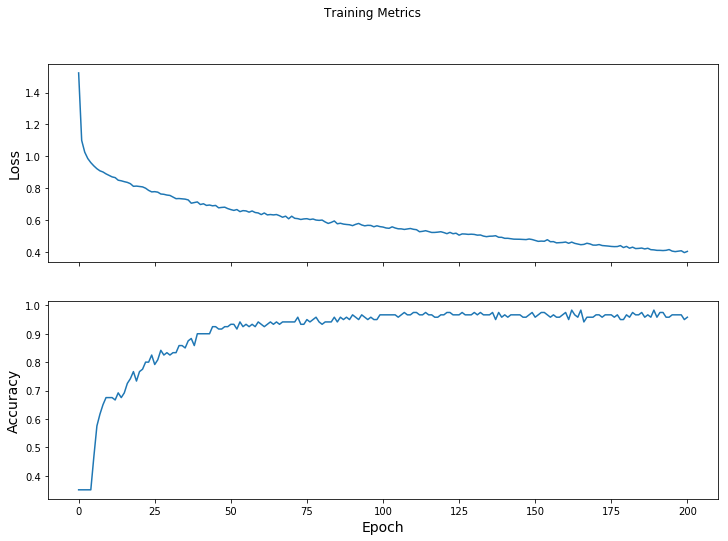

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# Evaluate the model on the test dataset

In [23]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [24]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [25]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
